# Tissue Classification using Neural Networks
In this lab we will explore the use of texture in images and traditional machine learning approaches such as clustering. The dataset we will be using is available here: http://dx.doi.org/10.5281/zenodo.53169. 

![alt text](https://www.researchgate.net/profile/Jakob_Kather/publication/303998214/figure/fig7/AS:391073710002224@1470250646407/Representative-images-from-our-dataset-Here-the-first-10-images-of-every-tissue-class.png)

The above figure shows the 8 different classes of tissue we will be trying to identify. 

In [0]:
# Imports
from __future__ import print_function
import os
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import pandas as po

## Step 1
* Load the data (done for you)
 * The "data" variable stores 5000 images of shape 150x150. This means data has shape (5000, 150, 150). These images are loaded here as grayscale.
 * The "labels" variable stores 5000 labels (0-7). This means "labels" has shape (5000,)
* Split data into training and testing subsets (left up to you)
 * Check out the sklearn function train_test_split from sklearn.model_selection

In [2]:
! git clone https://github.com/BeaverWorksMedlytics/Week3_public.git

# Build the path to the data folder. No need to change directories
# There are a total of 6 files you will have to load
data_dir = os.path.join( os.getcwd(), 'Week3_public', 'data', 'crc')

fatal: destination path 'Week3_public' already exists and is not an empty directory.


In [3]:
# Load data and split into training, testing sets
y = np.load(os.path.join(data_dir, 'rgb01.npz'))
labels = y['labels']
data = y['rgb_data']
data = data[:,:,:,0]
label_str = y['label_str']
label_str = label_str.tolist() # this is to convert label_str back to a dictionary
y = []

print(data.shape)
for ii in range(2,6):
    filename = os.path.join(data_dir, 'rgb0' + str(ii) + '.npz')
    print('loading ', filename)
    y = np.load(filename)
    labels = np.append(labels, y['labels'], axis=0)
    data = np.append(data, y['rgb_data'][:,:,:,0], axis=0)
    print(data.shape)
    y = []


print( data.shape )
print( labels.shape )

(1000, 150, 150)
loading  /content/Week3_public/data/crc/rgb02.npz
(2000, 150, 150)
loading  /content/Week3_public/data/crc/rgb03.npz
(3000, 150, 150)
loading  /content/Week3_public/data/crc/rgb04.npz
(4000, 150, 150)
loading  /content/Week3_public/data/crc/rgb05.npz
(5000, 150, 150)
(5000, 150, 150)
(5000,)


In [0]:
num_images, nrows, ncols = data.shape

# split into training and testing sets
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, random_state=0)
# convert the labels from 1-D arrays to categorical type 
labels_train=to_categorical(labels_train, num_classes=8)
labels_test=to_categorical(labels_test, num_classes=8)



In [5]:
labels.shape

(5000,)

## Normalize data
All images should be normalized to the range 0-1 by dividing by 255.

#### Note
* Using the La\*b colorspace : If you convert your images to the La\*b colorspace, the scaling factor will change. Each channel in this colorspace will have a different range and normalization of each space will involve scaling each channel separately. Additionally, the a\* channel can have a negative range. This also needs to be taken into account. 
* Using the HSV/HSI colorspace : Similar considerations apply if you are using the HSV/HSI colorspace. The only difference is that the HSV/HSI colorspace will have all positive values.

In [0]:
# Assuming we are using the RGB colorspace
# Normalize all images so that they are 0-1
data_train=data_train.astype(float)/255.
data_test=data_test.astype(float)/255.
data_train= data_train.reshape(4000,150*150)
data_test=data_test.reshape(1000,150*150)


## Step 2
At this point, the data has been split into training and testing sets and normalized. We will now design a fully connected neural network for texture classification. 


![alt text](http://adventuresinmachinelearning.com/wp-content/uploads/2017/04/CNN-example-block-diagram.jpg)


( Image from http://adventuresinmachinelearning.com/keras-tutorial-cnn-11-lines/ )

When designing a fully connected network for classification, we have several decisions to make.

**Network Architecuture**
* How many layers will our network have ?
* How many convolutional filters per layer ?
    * What is an appropriate filter size ? 
* What is an appropriate batch size, learning rate and number of training epochs ?

**Data input**
* Do we use the raw data ?
    * RGB or just gray channel ?
* Does the use of different colorspaces lead to better results for a given network architecture ?
* Can we use any of the texture features from the previous lab as inputs to this model ?
* How does data augmentation affect the results ? 

Other considerations, we will not be exploring :
* What is the trade-off between input data sizes and batch size ?
* Is the GPU always the appropriate platform for training ?
* How does hardware influence inputs and batch sizes for a given desired accuracy ?

In [0]:
# Define the data shapes based on your decision to use rgb or grayscale or other colorpsaces or texture features or 
# some combination of these inputs
num_classes = 8 
input_shape = nrows, ncols, 1
data_train= data_train.reshape(data_train.shape[0], nrows, ncols, 1)
data_test = data_test.reshape(data_test.shape[0], nrows, ncols, 1)

## Step 3
Design your network here using Keras

In [8]:
# Create your network
model = []
model = Sequential()

# Add input layer
model.add(Conv2D(12, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())




# Add fully connected layers
model.add(Dense(64, activation = 'relu'))
# See keras.io for Conv2D, MaxPool2D, Dropout documentation

# Add final output layer - This should have as many neurons as the number
# of classes we are trying to identify

model.add(Dense(8, activation = 'softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 12)      312       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 12)        0         
_________________________________________________________________
flatten (Flatten)            (None, 63948)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4092736   
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 520       
Total params: 4,093,568
Trainable params: 4,093,568
Non-trainable params: 0
_________________________________________________________________


## Step 4
Compile the model you designed. Compiltation of the Keras model results in the initialization of model weights and sets other model properties.

In [0]:
lr =  .0008
model.compile( optimizer=tf.train.AdamOptimizer(lr), loss='categorical_crossentropy', metrics = ['accuracy'] )

In [10]:
labels_train.shape

(4000, 8)

## Step 5
Train model

In [11]:
y = model.fit(data_train, labels_train, epochs=20)

Epoch 1/20
4000/4000 [==============================] - 65s 16ms/step - loss: 3.4836 - acc: 0.2747
Epoch 2/20
4000/4000 [==============================] - 64s 16ms/step - loss: 1.4103 - acc: 0.4240
Epoch 3/20
4000/4000 [==============================] - 64s 16ms/step - loss: 1.0866 - acc: 0.5168
Epoch 4/20
2240/4000 [===============>..............] - ETA: 28s - loss: 0.9552 - acc: 0.5946

4000/4000 [==============================] - 64s 16ms/step - loss: 0.9595 - acc: 0.5973
Epoch 5/20
4000/4000 [==============================] - 64s 16ms/step - loss: 0.8730 - acc: 0.6342
Epoch 6/20
4000/4000 [==============================] - 65s 16ms/step - loss: 0.8269 - acc: 0.6570
Epoch 7/20
3136/4000 [======================>.......] - ETA: 13s - loss: 0.7576 - acc: 0.7018

4000/4000 [==============================] - 64s 16ms/step - loss: 0.7531 - acc: 0.7007
Epoch 8/20
4000/4000 [==============================] - 64s 16ms/step - loss: 0.6751 - acc: 0.7388
Epoch 9/20
4000/4000 [==============================] - 64s 16ms/step - loss: 0.6039 - acc: 0.7665
Epoch 10/20
3296/4000 [=======================>......] - ETA: 11s - loss: 0.5635 - acc: 0.7904

4000/4000 [==============================] - 64s 16ms/step - loss: 0.5639 - acc: 0.7863
Epoch 11/20
4000/4000 [==============================] - 65s 16ms/step - loss: 0.5545 - acc: 0.7910
Epoch 12/20
4000/4000 [==============================] - 64s 16ms/step - loss: 0.4513 - acc: 0.8460
Epoch 13/20
3296/4000 [=======================>......] - ETA: 11s - loss: 0.3720 - acc: 0.8899

4000/4000 [==============================] - 64s 16ms/step - loss: 0.3771 - acc: 0.8850
Epoch 14/20
4000/4000 [==============================] - 64s 16ms/step - loss: 0.3833 - acc: 0.8705
Epoch 15/20
4000/4000 [==============================] - 65s 16ms/step - loss: 0.2930 - acc: 0.9155
Epoch 16/20
3296/4000 [=======================>......] - ETA: 11s - loss: 0.2579 - acc: 0.9257

4000/4000 [==============================] - 65s 16ms/step - loss: 0.2496 - acc: 0.9283
Epoch 17/20
4000/4000 [==============================] - 64s 16ms/step - loss: 0.2119 - acc: 0.9400
Epoch 18/20
4000/4000 [==============================] - 64s 16ms/step - loss: 0.2280 - acc: 0.9203
Epoch 19/20
3296/4000 [=======================>......] - ETA: 11s - loss: 0.1603 - acc: 0.9493

4000/4000 [==============================] - 64s 16ms/step - loss: 0.1759 - acc: 0.9423
Epoch 20/20
4000/4000 [==============================] - 64s 16ms/step - loss: 0.1515 - acc: 0.9547


In [13]:
data_train.shape

(4000, 150, 150, 1)

In [14]:
labels_train.shape

(5000, 8)

## Step 6
See how your model performs by uisng it for inference.
* What is the accuracy of classification ?
* Change your model, re-compile and test. Can you improve the accuracy of the model ?


In [33]:
# predict labels - use the test set for prediction
pred_labels = model.predict(data_test)
pred_labels

array([[1.43605500e-01, 3.54285151e-01, 6.38709590e-02, ...,
        1.39247289e-08, 4.50525346e-04, 7.65568416e-07],
       [7.25250643e-13, 4.26916245e-08, 7.20119233e-12, ...,
        1.15093305e-20, 1.36129156e-01, 1.05763016e-14],
       [3.30482908e-05, 3.13392434e-07, 5.17170830e-03, ...,
        1.59730494e-01, 6.65519251e-10, 8.35063994e-01],
       ...,
       [7.87481479e-03, 5.07762492e-01, 1.47954357e-04, ...,
        1.85937862e-10, 2.58256141e-02, 5.80703841e-08],
       [7.78182864e-01, 1.05546752e-03, 1.70106575e-01, ...,
        2.32796083e-05, 9.85981023e-06, 1.31955909e-04],
       [6.34931041e-07, 2.80315984e-08, 9.62197897e-04, ...,
        7.18869686e-01, 1.01820705e-10, 2.80167282e-01]], dtype=float32)

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# We need to convert the categorical array test_labels into a vector
# in order to use it in the calculation of the confusion matrix
mat = confusion_matrix(np.argmax(labels_test, axis=1), np.argmax(pred_labels, axis=1))
acc = accuracy_score(np.argmax(labels_test, axis=1), np.argmax(pred_labels, axis=1))
print(acc)
print(mat)

0.595
[[ 58  10  44   0  19   0   0   0]
 [  9  41   3  10  53   0   3   0]
 [ 46   8  61   1   5   0   0   3]
 [  0  14   0  58  10   0  25   0]
 [ 19  33   9   4  67   0   5   0]
 [  0   0   0   0   0 124   0   1]
 [  0   6   0  31  12   0  84   0]
 [  0   0   1   0   0  21   0 102]]


In [25]:
labels_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

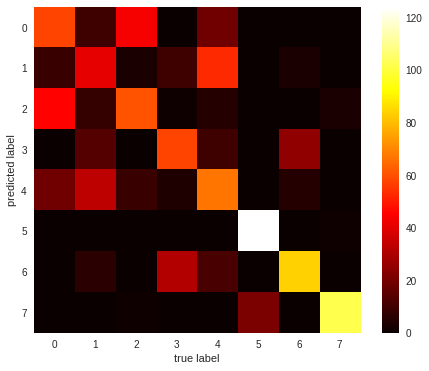

In [41]:
plt.figure(figsize=(8,6))
plt.imshow(mat, cmap='hot', interpolation='nearest')
plt.grid(False)
plt.colorbar()
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

## Assignment
* In Step 3 design your own network
* Does the model perform better if you use all three RGB channels ?
* How does the performance change when using the La*b colorspace ?


In [0]:

# Load data as RGB
y = np.load(os.path.join(data_dir, 'rgb01.npz'))
labels = y['labels']
data_rgb = y['rgb_data']
label_str = y['label_str']
label_str = label_str.tolist() # this is to convert label_str back to a dictionary
y = []

print(data_rgb.shape)
for ii in range(2,6):
    filename = os.path.join(data_dir, 'rgb0' + str(ii) + '.npz')
    print('loading ', filename)
    y = np.load(filename)
    labels = np.append(labels, y['labels'], axis=0)
    data_rgb = np.append(data_rgb, y['rgb_data'])
    print(data_rgb.shape)
    y = []

data_rgb = data_rgb.astype('float')
data_rgb = data_rgb.reshape(5000, 150, 150, 3)

print( data_rgb.shape )
print( labels.shape )

num_images, nrows, ncols, dims = data_rgb.shape